# Mercedes Time on Test-Bed Determination
<b>Introduction</b>
This is a competition posted by Mercedes-Benz to determine the time a car will spend on the test bed. The aim is to predict a continuous variable representing time with the help of 377 features. The features are both categorical and numerical in nature. Mercedes has not provided the exact names and nature of the variables for data privacy reasons.
The project involves data visualization, feature engineering and regression modelling.
If you like this notebook, please give an upvote.

# <a id = "table_of_content"></a>
1. [Importing the Libraries](#1)

2. [Importing the Dataset](#2) 

3. [Dataset Analysis and Correction](#3)
    * 3.1 [Observing the data](#3.1)
    * 3.2 [Dropping ID Column](#3.2)   
    * 3.3 [Determing Missing Values](#3.3)
    * 3.4 [Checking and Removing Outliers](#3.4)
4. [Visualizing and Comparing Features](#4)
    * 4.1 [Exploring the Distribution of Each Categorical Variable](#4.1)
    * 4.2 [Exploring the Spread of Each Numerical Variable](#4.2)
5. [Feature Engineering](#5) 
    * 5.1 [Removing Non-Variable Features](#5.1)
        * 5.1.1 [Removing Numerical Non-Variable Features](#5.1.1)
        * 5.1.2 [Removing Categorical Non-Variable Features](#5.1.2)
    * 5.2 [One-hot Encoding Categorical Features](#5.2)
6. [Building/Training/Evaluating our models](#6)
    * 6.1 [Modelling various Regressors](#6.1)
7. [Submitting The Best Model](#7)
    * 7.1 [Hyperparameter Tuning the Best Model](#7.1)
    * 7.2 [Submitting](#7.2)

### <a id = 1></a>1 - Importing the Libraries
[Go back to the Table of Contents](#table_of_content)

In [1]:
# libary for system file handling
import os

#Importing the data analysis libraries
import numpy as np # linear algebra
import pandas as pd # data processing

#Importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Ensuring that we don't see any warnings while running the cells
import warnings
warnings.filterwarnings('ignore') 

#Importing the counter
from collections import Counter

## <a id = 2></a>2 - Importing the Dataset
[Go back to the Table of Contents](#table_of_content)

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Reading the data from the given files and creating a training and test dataset
train = pd.read_csv("/kaggle/input/mercedes-benz-greener-manufacturing/train.csv.zip")
test = pd.read_csv("/kaggle/input/mercedes-benz-greener-manufacturing/test.csv.zip")

/kaggle/input/mercedes-benz-greener-manufacturing/train.csv.zip
/kaggle/input/mercedes-benz-greener-manufacturing/sample_submission.csv.zip
/kaggle/input/mercedes-benz-greener-manufacturing/test.csv.zip


## <a id = 3></a>3 -  Dataset Analysis and Correction
[Go back to the Table of Contents](#table_of_content)

### <a id = 3.1></a>3.1 - Observing the Data
[Go back to the Table of Contents](#table_of_content)

In [3]:
train.shape

(4209, 378)

In [4]:
train.sample(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2561,5136,86.33,y,aa,as,g,d,m,g,w,...,1,0,0,0,0,0,0,0,0,0
4045,8106,101.69,ay,r,as,f,d,w,d,j,...,0,0,0,0,0,0,0,0,0,0
1090,2165,89.02,al,o,ai,f,d,ab,g,p,...,0,0,0,0,0,0,0,0,0,0
2396,4808,121.92,j,aa,as,c,d,n,j,a,...,1,0,0,0,0,0,0,0,0,0
29,67,128.19,x,b,m,c,d,j,j,n,...,0,0,1,0,0,0,0,0,0,0
551,1079,90.54,y,aa,ay,c,d,d,k,w,...,1,0,0,0,0,0,0,0,0,0
550,1075,90.79,z,aa,ai,c,d,d,j,j,...,1,0,0,0,0,0,0,0,0,0
3049,6120,88.11,s,aa,ai,c,d,q,a,v,...,1,0,0,0,0,0,0,0,0,0
3355,6687,101.76,ay,b,as,c,d,s,j,i,...,0,0,1,0,0,0,0,0,0,0
179,376,110.55,at,b,aq,c,d,i,g,q,...,0,0,1,0,0,0,0,0,0,0


In [5]:
train.describe(include="all")

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209,4209,4209,4209,4209,4209,4209,4209,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
unique,NaN,NaN,47,27,44,7,4,29,12,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,z,aa,as,c,d,w,g,j,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,360,833,1659,1942,4205,231,1042,277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4205.960798,100.669318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
train.describe(exclude="object")

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<b>Initial Observations</b>
* ID column is not important and needs to be dropped
* There are 8 categorical features (X0, X1, X2, X3, X4, X5, X6, X8)
    * These columns will be one-hot encoded before the modelling
* The rest are numeric features which are all have values which are either zeros or ones
* upon closer inspection we can see that there are certain numeric columns that only have 0 values
    * These columns will be dropped as they provide no information gain

In [7]:
train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

### <a id = 3.2></a>3.2 - Dropping the ID Column
[Go back to the Table of Contents](#table_of_content)

In [8]:
train = train.drop(["ID"], axis=1)
idtest = test['ID']
test = test.drop(["ID"], axis=1)

### <a id = 3.3></a>3.3 - Determining the missing values
[Go back to the Table of Contents](#table_of_content)

In [9]:
print(train.isnull().sum())
train.columns[train.isnull().any()]

y       0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64


Index([], dtype='object')

In [10]:
print(test.isnull().sum())
test.columns[test.isnull().any()]

X0      0
X1      0
X2      0
X3      0
X4      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 376, dtype: int64


Index([], dtype='object')

### <a id = 3.4></a>3.4 - Checking and Removing Outliers
[Go back to the Table of Contents](#table_of_content)

<b>Observations</b>
* Since all the numeric features are binary, the concept of outliers can not be applied to them
* We must inspect the target variable for any outliers

In [11]:
def check_outliers(dataframe, n, features):
    
    indices = []
    
    for feature in features:
        
        #determining the upper and lower quartiles
        Quart1 = dataframe[feature].quantile(0.25)
        Quart3 = dataframe[feature].quantile(0.75)
        
        #determining the upper and lower outlier thresholds to remove the outliers
        upper_outlier_threshold = Quart3 + (Quart3 - Quart1) * 1.5
        lower_outlier_threshold = Quart1 - (Quart3 - Quart1) * 1.5
        
        #finding the outliers and saving their indices in the form of a list, according to the given threshold
        feature_outliers_list = dataframe[(dataframe[feature] > upper_outlier_threshold) | (dataframe[feature] < lower_outlier_threshold)].index
        
        #appending the outliers for each feature to the main outliers_indices list
        indices.extend(feature_outliers_list)
    
    #Selecting features that have more than n outliers
    return list(a for a, b in Counter(indices).items() if b > n)

In [12]:
train_outliers = check_outliers(train, 0, "y")
train.loc[train_outliers]

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
43,139.20,w,s,as,c,d,j,i,q,0,...,1,0,0,0,0,0,0,0,0,0
203,136.41,w,s,as,c,d,i,i,w,0,...,1,0,0,0,0,0,0,0,0,0
216,146.83,x,i,as,c,d,i,g,l,0,...,0,0,1,0,0,0,0,0,0,0
253,150.43,t,b,as,c,d,i,l,x,0,...,0,0,1,0,0,0,0,1,0,0
342,169.91,aa,l,ak,f,d,i,c,d,0,...,0,0,0,0,0,0,0,0,0,0
420,136.47,x,b,h,c,d,d,j,q,0,...,0,0,1,0,0,0,0,0,0,0
429,154.87,ak,l,ae,f,d,d,g,w,0,...,0,0,0,0,0,0,0,0,0,0
681,147.72,x,i,ae,c,d,c,g,y,0,...,0,0,1,0,0,0,0,0,0,0
846,140.49,x,aa,i,c,d,af,l,c,0,...,1,0,0,0,0,0,0,0,0,0
883,265.32,y,r,ai,f,d,ag,l,t,0,...,0,0,0,0,0,0,0,0,0,0


<b>Observations and Decisions</b>
* There are roughly 50 outliers in the target variable representing ~1% of the total data
* We will discard these outliers as they will cause problems for our model
* It is worthwhile to keep outliers to add extra insight, but in this case the outliers are few thus removing them would be ideal

In [13]:
train = train.drop(train_outliers, axis = 0).reset_index(drop = True)

### <a id = 3.2></a>3.3 - Joining Train and Test Data
[Go back to the Table of Contents](#table_of_content)

In [14]:
# df =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
# df.describe(include = "all")

## <a id = 4></a>4 - Visualizing and Comparing the Features
[Go back to the Table of Contents](#table_of_content)

### <a id = 4.1></a>4.1 - Exploring the Distribution of Each Categorical Variable
[Go back to the Table of Contents](#table_of_content)

In [15]:
def categorical_distribution_viz(df, feature):
    plt.figure(figsize=(10,6))
    # Visualization
    palette = sns.color_palette("husl", len(train["X0"].unique().tolist())) 
    sns.stripplot(x=feature, y='y', data=df, palette=palette)
    plt.title(f'Distribution of Target against {feature}')
    plt.show()

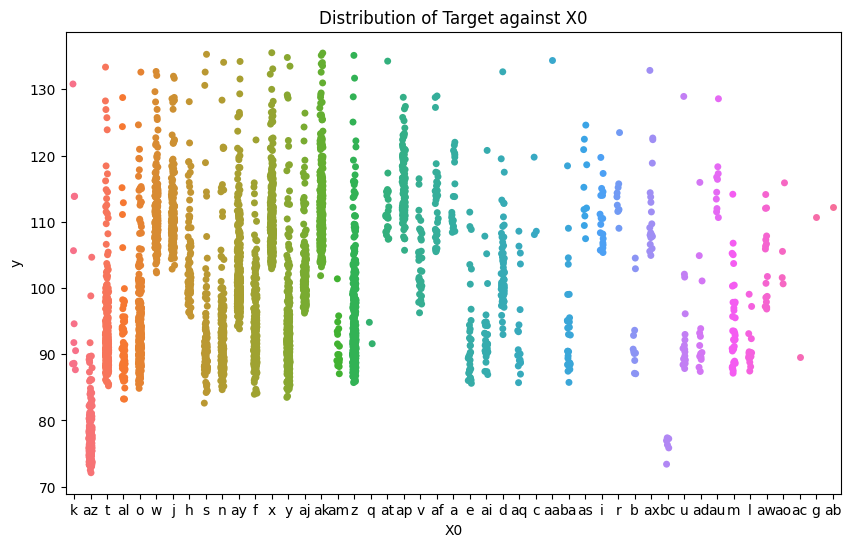

In [16]:
categorical_distribution_viz(train, "X0")

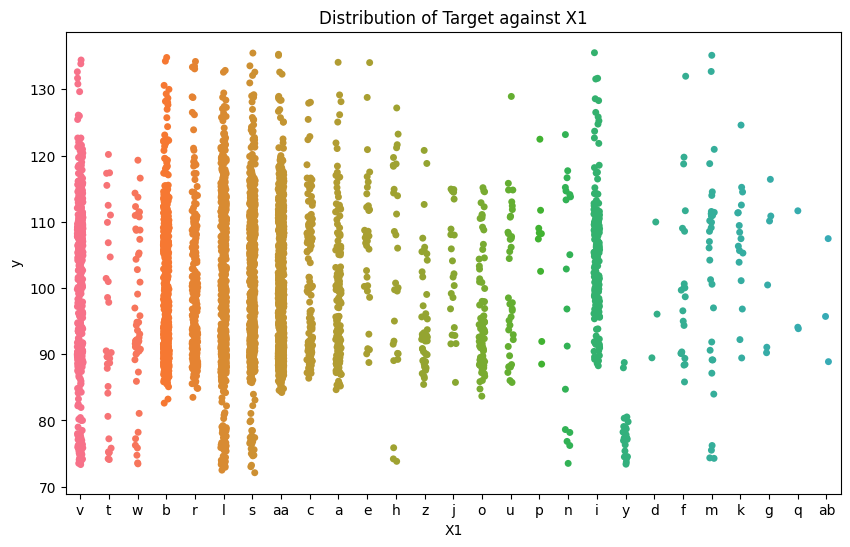

In [17]:
categorical_distribution_viz(train, "X1")

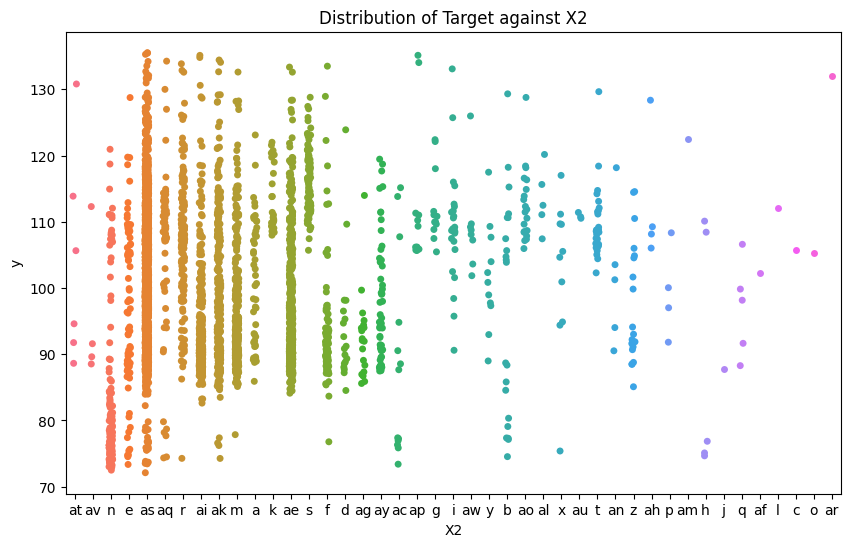

In [18]:
categorical_distribution_viz(train, "X2")

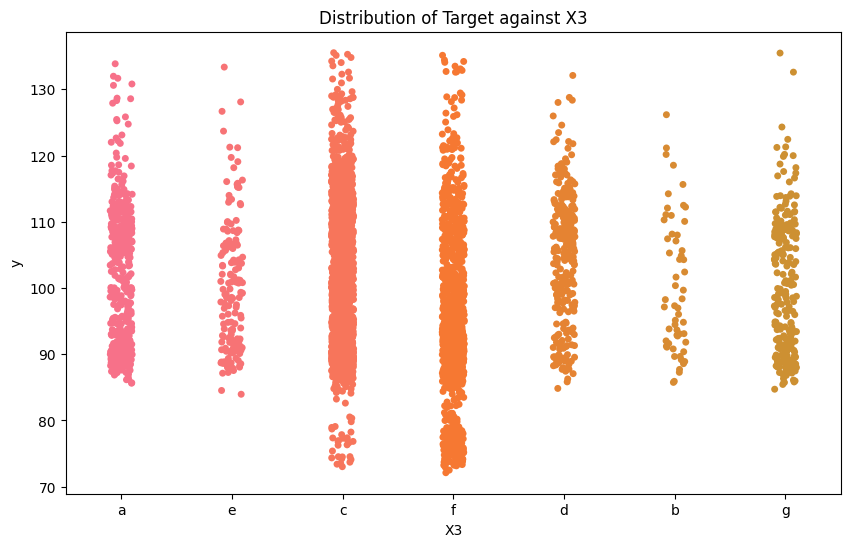

In [19]:
categorical_distribution_viz(train, "X3")

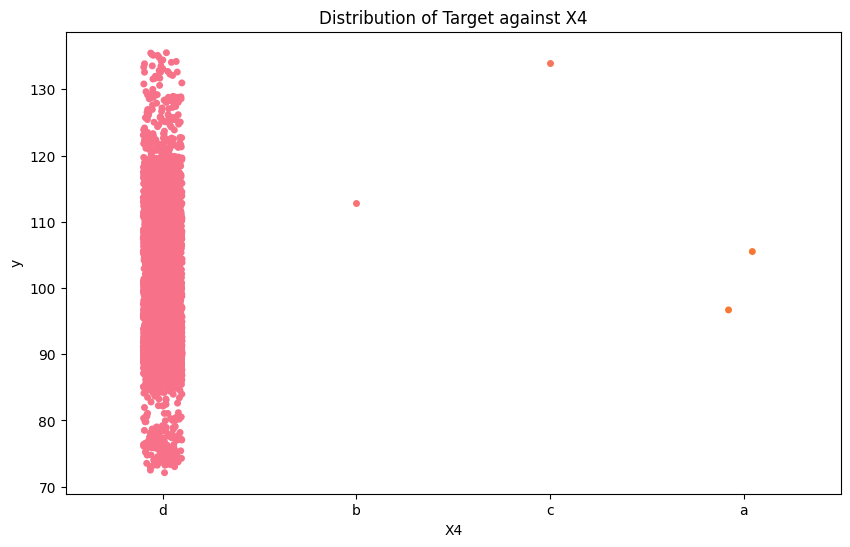

In [20]:
categorical_distribution_viz(train, "X4")

<b>Observations</b>
* The distribution in the feature "X4" is all concentrated within the category "d"
* This particular feature will not provide much insight into the data as almost all values are the value "d"
* This feature will be dropped before modeling

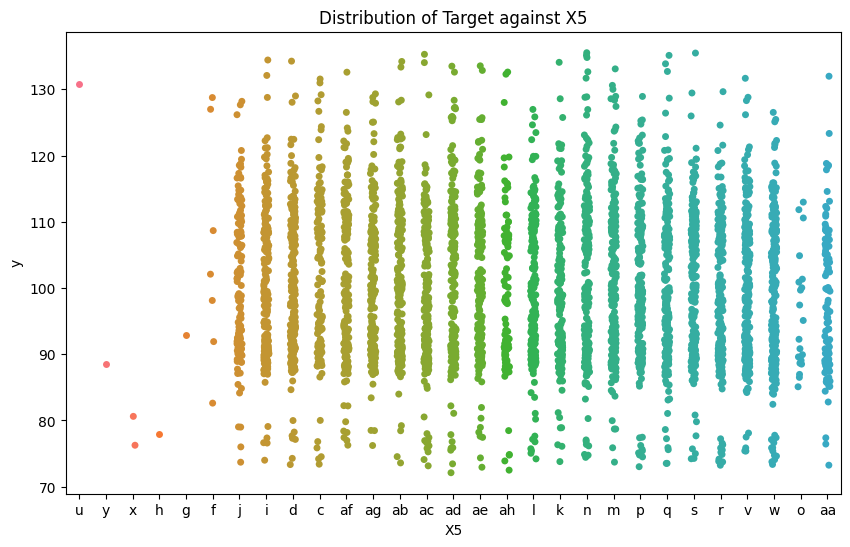

In [21]:
categorical_distribution_viz(train, "X5")

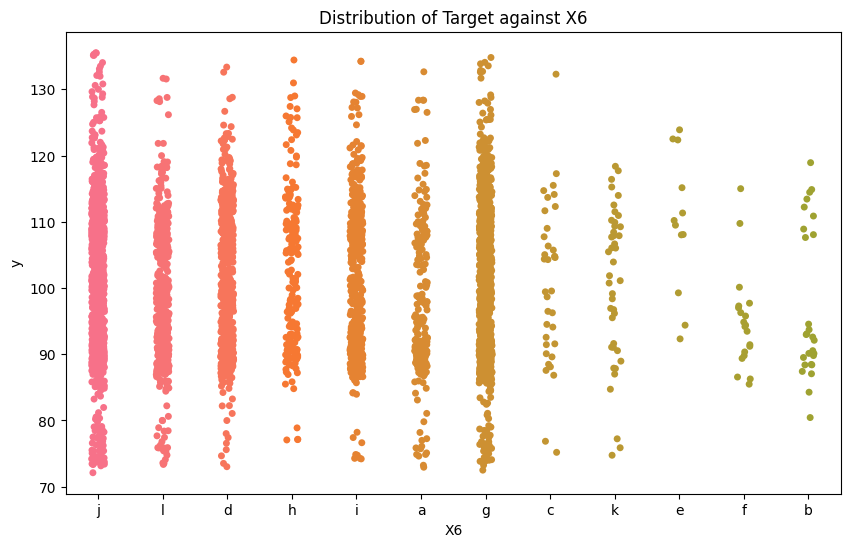

In [22]:
categorical_distribution_viz(train, "X6")

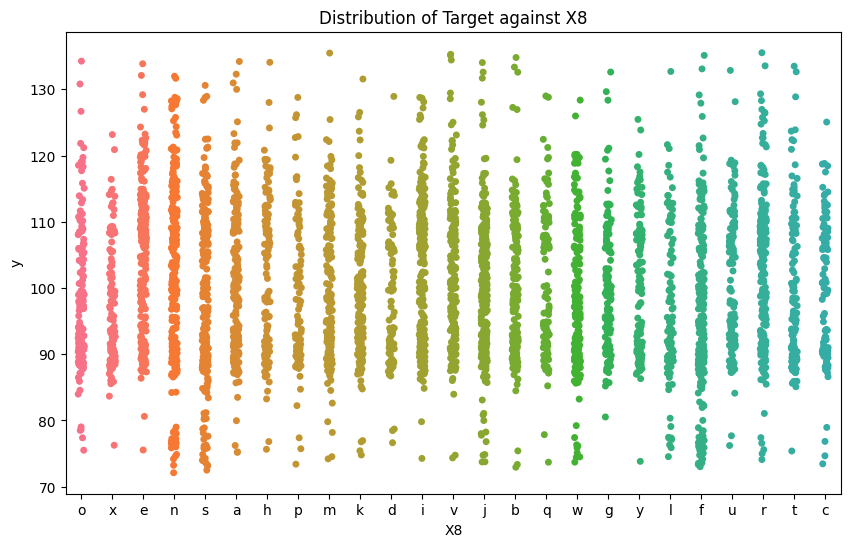

In [23]:
categorical_distribution_viz(train, "X8")

### <a id = 4.2></a>4.2 - Exploring the Spread of Each Numerical Variable
[Go back to the Table of Contents](#table_of_content)

In [24]:
df_list = list()
train1 = train.select_dtypes(exclude="object")

for col in train1.columns:
    zeros = (train1[col]==0).sum()
    ones = (train1[col]==1).sum()
    percent_ones = ones*100/(ones+zeros)
    percent_zeros = 100 - percent_ones
    df_list.append([col, percent_ones, percent_zeros])
    print(f"Feature: {col}, % Ones: {round(percent_ones, 1)}, % Zeros: {round(percent_zeros, 1)}")

df = pd.DataFrame(df_list, columns=['Feature', 'Percent Ones (%)', 'Percent Zeros (%)'])

Feature: y, % Ones: nan, % Zeros: nan
Feature: X10, % Ones: 1.3, % Zeros: 98.7
Feature: X11, % Ones: 0.0, % Zeros: 100.0
Feature: X12, % Ones: 7.5, % Zeros: 92.5
Feature: X13, % Ones: 5.8, % Zeros: 94.2
Feature: X14, % Ones: 42.8, % Zeros: 57.2
Feature: X15, % Ones: 0.0, % Zeros: 100.0
Feature: X16, % Ones: 0.3, % Zeros: 99.7
Feature: X17, % Ones: 0.8, % Zeros: 99.2
Feature: X18, % Ones: 0.8, % Zeros: 99.2
Feature: X19, % Ones: 10.1, % Zeros: 89.9
Feature: X20, % Ones: 14.3, % Zeros: 85.7
Feature: X21, % Ones: 0.3, % Zeros: 99.7
Feature: X22, % Ones: 8.7, % Zeros: 91.3
Feature: X23, % Ones: 2.1, % Zeros: 97.9
Feature: X24, % Ones: 0.2, % Zeros: 99.8
Feature: X26, % Ones: 0.5, % Zeros: 99.5
Feature: X27, % Ones: 68.3, % Zeros: 31.7
Feature: X28, % Ones: 3.3, % Zeros: 96.7
Feature: X29, % Ones: 4.4, % Zeros: 95.6
Feature: X30, % Ones: 0.5, % Zeros: 99.5
Feature: X31, % Ones: 23.3, % Zeros: 76.7
Feature: X32, % Ones: 1.1, % Zeros: 98.9
Feature: X33, % Ones: 0.0, % Zeros: 100.0
Feature: X3

<b>Observations and Decisions</b>
* It can be observed that alot of the features have one dominant values
* The dominant value is so much so that more than 99% of values belong to one value
* This features have almost no variability
* Features with mostly one value don't provide much information to the model because they don't vary across the dataset. 
* Models may not learn useful patterns from such features, and including them could potentially lead to overfitting
* We must remove these variables before modeling

## <a id = 5></a>5 -  Feature Engineering
[Go back to the Table of Contents](#table_of_content)

In [25]:
df.head()

,Feature,Percent Ones (%),Percent Zeros (%)
0,y,NaN,NaN
1,X10,1.346478,98.653522
2,X11,0.000000,100.000000
3,X12,7.453715,92.546285
4,X13,5.794662,94.205338


### <a id = 5.1></a>5.1 - Removing Non-Variable Features
[Go back to the Table of Contents](#table_of_content)

<b>Observations</b>
* As discussed before, having non-variable features adds little to no information when modeling, instead it makes the model overfit
* It is thus wise to remove them before training the model

### <a id = 5.1.1></a>5.1.1 - Removing Numerical Non-Variable Features
[Go back to the Table of Contents](#table_of_content)

In [26]:
# Filter the DataFrame based on your condition
non_variable_features = df[(df['Percent Ones (%)'] > 99) | (df['Percent Zeros (%)'] > 99)]

# Get the names of the features satisfying the condition
feature_names = non_variable_features['Feature'].tolist()

print("Features with percentage of 1s or 0s greater than 99%:", feature_names)
print(f"Total number of Non-Variable Features: {len(feature_names)}")

Features with percentage of 1s or 0s greater than 99%: ['X11', 'X15', 'X16', 'X17', 'X18', 'X21', 'X24', 'X26', 'X30', 'X33', 'X34', 'X36', 'X39', 'X40', 'X42', 'X53', 'X55', 'X59', 'X60', 'X62', 'X65', 'X67', 'X74', 'X78', 'X83', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X97', 'X99', 'X102', 'X104', 'X105', 'X107', 'X110', 'X112', 'X122', 'X123', 'X124', 'X125', 'X145', 'X153', 'X160', 'X165', 'X167', 'X169', 'X172', 'X173', 'X183', 'X184', 'X190', 'X192', 'X196', 'X199', 'X200', 'X204', 'X205', 'X207', 'X210', 'X212', 'X213', 'X214', 'X216', 'X217', 'X221', 'X227', 'X230', 'X233', 'X235', 'X236', 'X237', 'X239', 'X240', 'X242', 'X243', 'X245', 'X248', 'X249', 'X252', 'X253', 'X254', 'X257', 'X258', 'X259', 'X260', 'X262', 'X266', 'X267', 'X268', 'X269', 'X270', 'X271', 'X277', 'X278', 'X280', 'X281', 'X282', 'X288', 'X289', 'X290', 'X292', 'X293', 'X295', 'X296', 'X297', 'X298', 'X299', 'X307', 'X308', 'X309', 'X310', 'X312', 'X317', 'X318', 'X319', 'X320

<b>Observations</b>
* A total of 147 features had little to no variability and thus will be dropped from the dataframes

In [27]:
train = train.drop(feature_names, axis=1)
test = test.drop(feature_names, axis=1)
print(train.shape)
print(test.shape)

(4159, 230)
(4209, 229)


### <a id = 5.1.2></a>5.1.2 - Removing Categorical Non-Variable Features
[Go back to the Table of Contents](#table_of_content)

In [28]:
train = train.drop("X4", axis=1)
test = test.drop("X4", axis=1)
print(train.shape)
print(test.shape)

(4159, 229)
(4209, 228)


### <a id = 5.2></a>5.2 - One-hot Encoding Categorical Features
[Go back to the Table of Contents](#table_of_content)

In [29]:
cat_features = train.select_dtypes(include=['object']).columns.tolist()

In [30]:
cat_features

['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8']

In [31]:
train_distinct_values = train.nunique()
train_distinct_values

y       2496
X0        47
X1        27
X2        43
X3         7
        ... 
X374       2
X375       2
X376       2
X377       2
X378       2
Length: 229, dtype: int64

In [32]:
test_distinct_values = test.nunique()
test_distinct_values

X0      49
X1      27
X2      45
X3       7
X5      32
        ..
X374     2
X375     2
X376     2
X377     2
X378     2
Length: 228, dtype: int64

In [33]:
# Concatenate training and test datasets
combined = pd.concat([train, test], axis=0)

# Perform one-hot encoding
combined_encoded = pd.get_dummies(combined, columns = cat_features, dtype = int)

# Split back into training and test sets
train_enc = combined_encoded.iloc[:len(train)]
test_enc = combined_encoded.iloc[len(train):]

In [34]:
train_enc.head()

,y,X10,X12,X13,X14,X19,X20,X22,X23,X27,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,130.81,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,80.62,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test_enc.head()

,y,X10,X12,X13,X14,X19,X20,X22,X23,X27,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,NaN,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,NaN,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,NaN,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,NaN,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## <a id = 6></a>6 - Building/Training/Evaluating our model
[Go back to the Table of Contents](#table_of_content)

### <a id = 6.1></a> 6.1 - Modelling various Regressors
[Go back to the Table of Contents](#table_of_content)

In [36]:
X_train = train_enc.drop("y", axis=1)
y_train = train_enc["y"]

In [37]:
X_train

,X10,X12,X13,X14,X19,X20,X22,X23,X27,X28,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4154,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4156,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4157,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [38]:
y_train

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4154    107.39
4155    108.77
4156    109.22
4157     87.48
4158    110.85
Name: y, Length: 4159, dtype: float64

In [39]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 60.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [40]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# Initialize regression models
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'SVR': SVR(),
    'XGBR': XGBRegressor(positive=True),
    'Random Forest Regression': RandomForestRegressor(),
    'CatBoost Regression': CatBoostRegressor(silent=True)
}

# Initialize k-fold cross-validation
k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each model
for name, model in models.items():
    print(f"Model: {name}")

    # Calculate R^2 score
    r2_scores = cross_val_score(model, X_train, y_train, cv=k_folds, scoring='r2')
    
    # Print R^2 scores for each fold
    print("R^2 scores:", r2_scores)
    
    # Calculate and print average R^2
    avg_r2 = np.mean(r2_scores)
    print("Average R^2:", avg_r2)
    print()

Model: Ridge Regression
R^2 scores: [0.6030426  0.66235077 0.6032604  0.65055716 0.58940644]
Average R^2: 0.6217234764246748

Model: Lasso Regression
R^2 scores: [0.45502774 0.454333   0.4442375  0.42375618 0.39657954]
Average R^2: 0.4347867929141495

Model: SVR
R^2 scores: [0.58735853 0.63653024 0.57786075 0.59989707 0.54251242]
Average R^2: 0.5888318019034771

Model: XGBR
R^2 scores: [0.56032288 0.61172083 0.54144797 0.6005045  0.560511  ]
Average R^2: 0.5749014360871152

Model: Random Forest Regression
R^2 scores: [0.5887001  0.6432377  0.57409857 0.63299017 0.59224832]
Average R^2: 0.606254970627669

Model: CatBoost Regression
R^2 scores: [0.60998214 0.66491928 0.60042372 0.64505867 0.6101154 ]
Average R^2: 0.6260998421129162



## <a id = 7></a>7 - Submitting The Best model
[Go back to the Table of Contents](#table_of_content)

### <a id = 7.1></a> 7.1 - Hyperparameter Tuning the Best Model
[Go back to the Table of Contents](#table_of_content)

In [41]:
from sklearn.model_selection import GridSearchCV

# 2. Define the model
model = CatBoostRegressor(verbose=False)

# 3. Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3, 5],
}

# 4. Instantiate GridSearchCV
best_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# 5. Fit the model to your data
best_model.fit(X_train, y_train)

# 6. Retrieve the best parameters and best score
print("Best parameters found: ", best_model.best_params_)
print("Best score found: ", best_model.best_score_)

Best parameters found:  {'depth': 4, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
Best score found:  0.6434372804804998


### <a id = 7.2></a> 7.2 - Submitting
[Go back to the Table of Contents](#table_of_content)

In [42]:
X_train = train_enc.drop(labels="y", axis=1)
y_train = train_enc["y"]
X_test = test_enc.drop(labels="y", axis=1)


preds = best_model.predict(X_test)

test_predictions = pd.Series(preds, name="y")
mercedes_results = pd.concat([idtest, test_predictions], axis = 1)
mercedes_results.to_csv('submission.csv', index=False)

In [43]:
mercedes_results

,ID,y
0,1,78.969006
1,2,93.713398
2,3,78.831541
3,4,78.759898
4,5,110.869295
...,...,...
4204,8410,103.140076
4205,8411,93.292954
4206,8413,93.104942
4207,8414,110.252193
